Mount my Google Drive

*   For backup
*   For storage
*   For file transfer






In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir="/content/gdrive/My drive"
base_dir=root_dir+"fastai-v3"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


 Import some libraries and modules for performing some operation

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Setup batch size i.e. size of processing image at one time

In [0]:
bs=64


[googles_image_download_module](https://github.com/hardikvasa/google-images-download) to download the images and form a dataset

In [0]:
!pip install google_images_download


     |████████████████████████████████| 911kB 7.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


THe script downloads images in folder ("your foldername ")
It accepts 4 parameters

1.   Imagename to be searched
2.   How many images to download
3.   The number of iteration to perform this script
4.   The folder name you want to save





In [0]:
!cat a.sh

#!/bin/bash
for ((i=1;i<=$3;i++))
do
googleimagesdownload -k "$1" -s medium -wr '{"time_min":"0'$i'/01/2018","time_max":"0'$i'/30/2018"}' -l "$2" -o /content/downloaded -i train/$4
done


NOw download the images of dog

In [0]:
!bash a.sh "dog" "90" "10" "Dog"


Item no.: 1 --> Item name = dog
Evaluating...
Starting Download...
Completed Image ====> 1.shelter-dog-cropped-1-632x329.jpeg
Completed Image ====> 2.most-common-dog-bacterial-infections--1024x681.jpg
Completed Image ====> 3.pup-1.png
Completed Image ====> 4.most-common-dog-digestive-problems-1024x688.jpg
Completed Image ====> 5.thyroid_disease_in_dogs_hero_.jpg
Completed Image ====> 6.180109-dog-listening-mn-1215_86fd9caebf17bddbf5310597b860cef9.nbcnews-fp-1200-630.jpg
Completed Image ====> 7.dog-noise-anxiety.jpg
Completed Image ====> 8.zhdfbwvbc2miyqyaryl9.jpg
Completed Image ====> 9.pax_memphis_listing.jpg
Completed Image ====> 10.white-korean-jindo-800x540.jpg
Completed Image ====> 11.IMG_1251.jpg
Completed Image ====> 12.920x920.jpg
Completed Image ====> 13.animal-cruelty-dog-fighting-tabs-header.jpg
Completed Image ====> 14.A-dog-vomiting.jpg
Completed Image ====> 15.night-animal-dog-pet.jpg
Completed Image ====> 16.adopt-dogs-foster-800x420.jpg
Completed Image ====> 17.DOOR_IS

Now we will download fox images

In [0]:
!bash a.sh "fox" "90" "10" "Fox"


Item no.: 1 --> Item name = fox
Evaluating...
Starting Download...
Completed Image ====> 1.207fa81785486a9863b285e44341cef6.jpg
Completed Image ====> 2.Arctic-Fox_1600px-600x600.png
Completed Image ====> 3.the-poor-fox-5a28fd2cd64b80.8513490415126356928778.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 4.rr01_jd_06jan_fox-1-700x932.jpg
Completed Image ====> 5.foxdaytimesick.jpg
Completed Image ====> 6.Juniper-the-fox.png
Completed Image ====> 7.so-cute-fox-in-the-snow.jpg
Completed Image ====> 8.AMY_3035-Edit.jpg
Completed Image ====> 9.Fox.jpg
Completed Image ====> 10.Angel%20in%20August.JPG
Completed Image ====> 11.Fox.jpg
Completed Image ====> 12.fennec-fox.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 13.PEI-TEENS.jpg
Completed Image ====> 14.Sample-picture-of-a-young-fox-shown-in-the-photographs-condition-this-photograph-is.png
Invalid or missing image format. Skipping...
Completed Image ====> 15.trapfree%20swift%20fox%20from%20env

Now clean the dataset, we will be using dataset of only jpeg/jpg files

In [0]:
!find /content/downloaded/train/Dog -type f ! \( -iname '*.jpeg' -o -iname '*jpg' \) -delete

In [0]:
!find /content/downloaded/train/Fox -type f ! \( -iname '*.jpeg' -o -iname '*jpg' \) -delete

Now make the same extension for ease i.e. ''.jpg"

In [0]:
cd downloaded/train/Dog

/content/downloaded/train/Dog


In [0]:
!ls -v | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done

In [0]:
!ls -la | head -n 10

total 88324
drwxr-xr-x 2 root root  65536 May 21 19:12 .
drwxr-xr-x 4 root root   4096 May 21 19:02 ..
-rw-r--r-- 1 root root 102743 May 21 18:56 100.jpg
-rw-r--r-- 1 root root  70695 May 21 18:58 101.jpg
-rw-r--r-- 1 root root 559816 May 21 18:57 102.jpg
-rw-r--r-- 1 root root  82060 May 21 18:57 103.jpg
-rw-r--r-- 1 root root  61969 May 21 18:56 104.jpg
-rw-r--r-- 1 root root 202414 May 21 18:59 105.jpg
-rw-r--r-- 1 root root  36061 May 21 18:58 106.jpg


In [0]:
cd /content/downloaded/train/Fox

/content/downloaded/train/Fox


In [0]:
!ls -v | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done

In [0]:
!ls -la | head -n 10

total 75964
drwxr-xr-x 2 root root  53248 May 21 19:13 .
drwxr-xr-x 4 root root   4096 May 21 19:02 ..
-rw-r--r-- 1 root root 186478 May 21 19:05 100.jpg
-rw-r--r-- 1 root root 105129 May 21 19:03 101.jpg
-rw-r--r-- 1 root root 489313 May 21 19:07 102.jpg
-rw-r--r-- 1 root root  80611 May 21 19:08 103.jpg
-rw-r--r-- 1 root root 163775 May 21 19:05 104.jpg
-rw-r--r-- 1 root root  57688 May 21 19:05 105.jpg
-rw-r--r-- 1 root root 295621 May 21 19:08 106.jpg


Now every dataset has to be converted into two parts i.e. training data and validation data, so we have to convert our dataset into two dataset i.e. training dataset and validation dataset

In [0]:
 !mkdir /content/downloaded/valid && mkdir /content/downloaded/valid/Dog && mkdir /content/downloaded/valid/Fox

In [0]:
!find . -name '*.jpg' | head -n 90 | xargs -I {} mv {} /content/downloaded/valid/Dog/

In [0]:
!ls /content/downloaded/valid/Dog/ -1 | wc -l

90


In [0]:
!find /content/downloaded/train/Fox -name '*.jpg' | head -n 90 | xargs -I {} mv {} /content/downloaded/valid/Fox/

In [0]:
!ls /content/downloaded/valid/Fox/ -1 | wc -l

90


Now the training part begins, provide path of dataset to the model 

In [0]:
path = "/content/downloaded/"

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

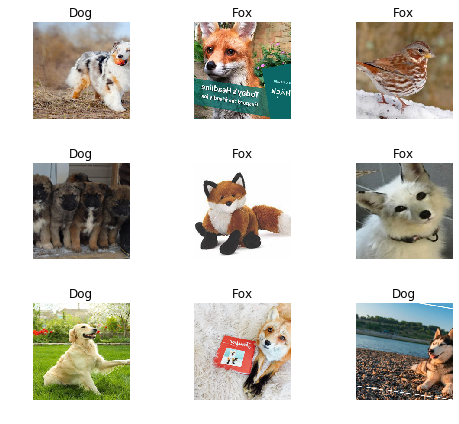

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
len(data.classes),data.c

(2, 2)

Now choose our learner model pass it our ImageDataBunch Object. here resnet34 is used beacause it is faster than resnet50

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
  learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.454739,3.668459,0.494444,00:36
1,0.251922,3.618725,0.477778,00:34
2,0.184723,3.443252,0.488889,00:36
3,0.140165,3.346353,0.488889,00:35


Now lets save this model

In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

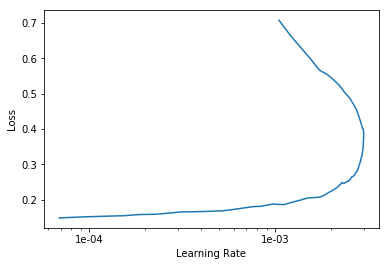

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.099688,3.640859,0.488889,00:37
1,0.075524,3.799119,0.477778,00:37


In [0]:
learn.save('stage-2')

Now lets create an Interpretation object to understand where our model failed for that 0.005 %



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

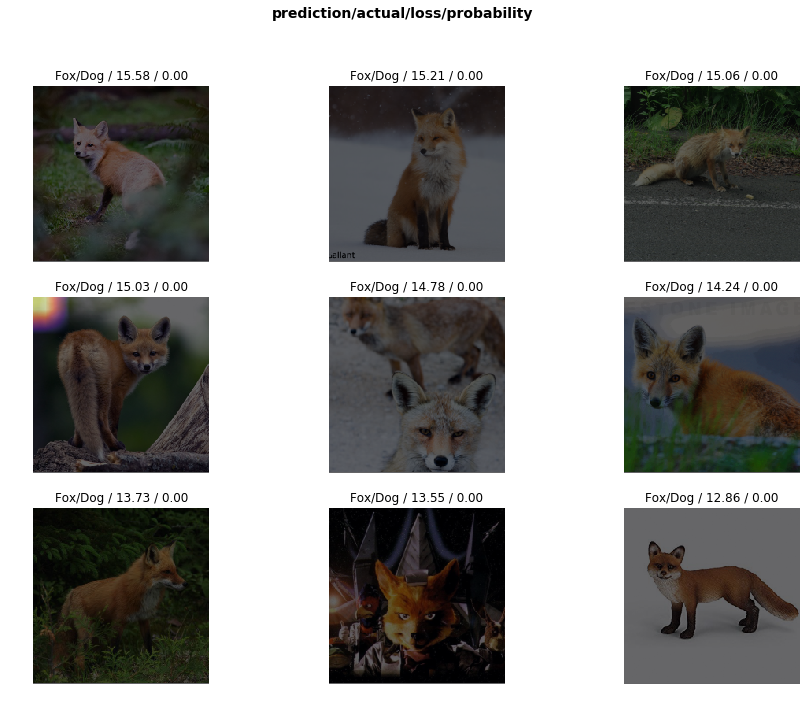

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

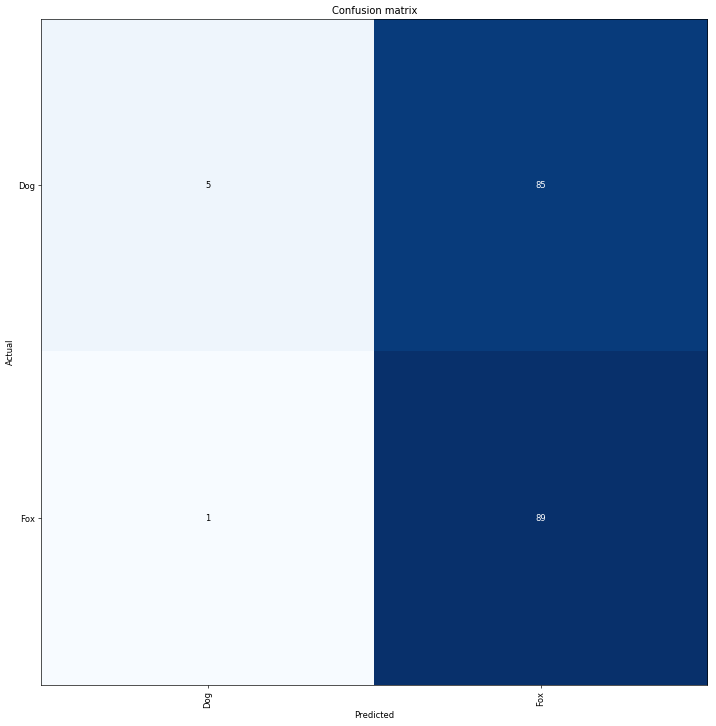

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

#Cleaning Up
There are some top losses in our model, which occur due to some images which shouldn't be in our dataset
So we use [File Deleter](https://docs.fast.ai/widgets.image_cleaner.html) widget from Fastai to remove those images.

In [0]:
from fastai.widgets import*

We need the path of top_losses. We can do this .from_toplosses then we will give the top losses indexes and datasets to ImageCleaner

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

Now create the new learner to use the new databunch

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [0]:
learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

#Things that can go wrong

*  Most of the time things will train fine with defaults
*   There's not much you really need to tune (despite what you've heard!)
*  Most likely are
  * Learning rate
  * Number of epochs


##Learning rate too high


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,9.853873,30328.869141,0.500000,00:36


##Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.963684,0.733199,0.472222,00:34
1,0.891889,0.749709,0.466667,00:36
2,0.833272,0.767564,0.466667,00:34
3,0.819033,0.782084,0.461111,00:36
4,0.793059,0.784785,0.472222,00:36


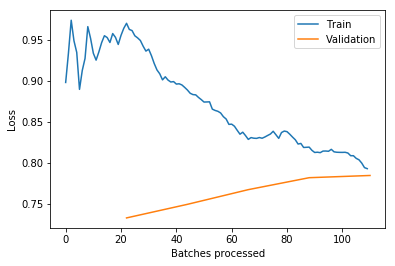

In [0]:
learn.recorder.plot_losses()

##Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.819284,0.769423,0.511111,00:35


##Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 89372331.51it/s]


In [0]:
learn.fit_one_cycle(30, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.865493,0.777742,0.586912,00:35
1,0.827036,0.721560,0.482618,00:31
2,0.772871,0.625015,0.334697,00:34
3,0.703507,0.499970,0.218814,00:31
4,0.635989,0.400973,0.144513,00:32
5,0.569229,0.353475,0.107703,00:30
6,0.515904,0.335253,0.106339,00:30
7,0.456704,0.339960,0.117246,00:32
8,0.409475,0.340704,0.119973,00:30
9,0.362831,0.342837,0.119973,00:32
